In [1]:
def my_draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=None,
    label_pos=0.5,
    font_size=10,
    font_color="k",
    font_family="sans-serif",
    font_weight="normal",
    alpha=None,
    bbox=None,
    horizontalalignment="center",
    verticalalignment="center",
    ax=None,
    rotate=True,
    clip_on=True,
    rad=0
):
    """Draw edge labels.

    Parameters
    ----------
    G : graph
        A networkx graph

    pos : dictionary
        A dictionary with nodes as keys and positions as values.
        Positions should be sequences of length 2.

    edge_labels : dictionary (default={})
        Edge labels in a dictionary of labels keyed by edge two-tuple.
        Only labels for the keys in the dictionary are drawn.

    label_pos : float (default=0.5)
        Position of edge label along edge (0=head, 0.5=center, 1=tail)

    font_size : int (default=10)
        Font size for text labels

    font_color : string (default='k' black)
        Font color string

    font_weight : string (default='normal')
        Font weight

    font_family : string (default='sans-serif')
        Font family

    alpha : float or None (default=None)
        The text transparency

    bbox : Matplotlib bbox, optional
        Specify text box properties (e.g. shape, color etc.) for edge labels.
        Default is {boxstyle='round', ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)}.

    horizontalalignment : string (default='center')
        Horizontal alignment {'center', 'right', 'left'}

    verticalalignment : string (default='center')
        Vertical alignment {'center', 'top', 'bottom', 'baseline', 'center_baseline'}

    ax : Matplotlib Axes object, optional
        Draw the graph in the specified Matplotlib axes.

    rotate : bool (deafult=True)
        Rotate edge labels to lie parallel to edges

    clip_on : bool (default=True)
        Turn on clipping of edge labels at axis boundaries

    Returns
    -------
    dict
        `dict` of labels keyed by edge

    Examples
    --------
    >>> G = nx.dodecahedral_graph()
    >>> edge_labels = nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))

    Also see the NetworkX drawing examples at
    https://networkx.org/documentation/latest/auto_examples/index.html

    See Also
    --------
    draw
    draw_networkx
    draw_networkx_nodes
    draw_networkx_edges
    draw_networkx_labels
    """
    import matplotlib.pyplot as plt
    import numpy as np

    if ax is None:
        ax = plt.gca()
    if edge_labels is None:
        labels = {(u, v): d for u, v, d in G.edges(data=True)}
    else:
        labels = edge_labels
    text_items = {}
    for (n1, n2), label in labels.items():
        (x1, y1) = pos[n1]
        (x2, y2) = pos[n2]
        (x, y) = (
            x1 * label_pos + x2 * (1.0 - label_pos),
            y1 * label_pos + y2 * (1.0 - label_pos),
        )
        pos_1 = ax.transData.transform(np.array(pos[n1]))
        pos_2 = ax.transData.transform(np.array(pos[n2]))
        linear_mid = 0.5*pos_1 + 0.5*pos_2
        d_pos = pos_2 - pos_1
        rotation_matrix = np.array([(0,1), (-1,0)])
        ctrl_1 = linear_mid + rad*rotation_matrix@d_pos
        ctrl_mid_1 = 0.5*pos_1 + 0.5*ctrl_1
        ctrl_mid_2 = 0.5*pos_2 + 0.5*ctrl_1
        bezier_mid = 0.5*ctrl_mid_1 + 0.5*ctrl_mid_2
        (x, y) = ax.transData.inverted().transform(bezier_mid)

        if rotate:
            # in degrees
            angle = np.arctan2(y2 - y1, x2 - x1) / (2.0 * np.pi) * 360
            # make label orientation "right-side-up"
            if angle > 90:
                angle -= 180
            if angle < -90:
                angle += 180
            # transform data coordinate angle to screen coordinate angle
            xy = np.array((x, y))
            trans_angle = ax.transData.transform_angles(
                np.array((angle,)), xy.reshape((1, 2))
            )[0]
        else:
            trans_angle = 0.0
        # use default box of white with white border
        if bbox is None:
            bbox = dict(boxstyle="round", ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0))
        if not isinstance(label, str):
            label = str(label)  # this makes "1" and 1 labeled the same

        t = ax.text(
            x,
            y,
            label,
            size=font_size,
            color=font_color,
            family=font_family,
            weight=font_weight,
            alpha=alpha,
            horizontalalignment=horizontalalignment,
            verticalalignment=verticalalignment,
            rotation=trans_angle,
            transform=ax.transData,
            bbox=bbox,
            zorder=1,
            clip_on=clip_on,
        )
        text_items[(n1, n2)] = t

    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )

    return text_items

In [2]:
#importing all the packages necessary
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import networkx as nx
import itertools
import matplotlib.colors as colors
import matplotlib.cm as cmx
epsilon = 1e-10 #this is the default value im assigning all variables so that we dont get a division error if the value = 0
#matplotlib parameters


In [3]:
import csv
import itertools

# Open the CSV file
with open('SpawnNTSeptemberFinal.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    header = next(reader)  # Read the header
    # Initializing variables
    edited_column_loop = [] #This will store the behavior values
    column_index = None 
    tank_ids = [] #This will store the tank ids

    # Check if 'Behavior' and 'Tank_ID' are in the header
    if "Behavior" in header and "TankID" in header:
        behavior_index = header.index("Behavior")
        tank_id_index = header.index("TankID")
        print(f"Column 'Behavior' found at index {behavior_index}")
        print(f"Column 'TankID' found at index {tank_id_index}")

        # Process each row
        for row in reader:
            if behavior_index < len(row) and tank_id_index < len(row):
                behavior_value = row[behavior_index]
                #print(behavior_value)
                edited_behavior_value = behavior_value.replace(' ', '_')
                #print(edited_behavior_value)
                edited_column_loop.append(edited_behavior_value)
                tank_ids.append(row[tank_id_index])
# Display unique edited behaviors and tank IDs
print("Unique edited behaviors:", set(edited_column_loop))
print("Unique Tank IDs:", set(tank_ids))


Column 'Behavior' found at index 1
Column 'TankID' found at index 2
Unique edited behaviors: {'pot_entry', 'quiver_at_female', 'attack_female', 'dig', 'chase_female', 'flee_from_female', 'pot_exit', 'lead_swim'}
Unique Tank IDs: {'S10_NT', 'S8_NT', 'S1_NT', 'S12_NT', 'S9_NT', 'S3_NT', 'S14_NT', 'S5_NT', 'S13_NT', 'S11_NT'}


In [4]:
def normalize_dict_to_range(data, new_min=100, new_max=600):
    # Extract values from the dictionary
    values = list(data.values())
    
    # Find the minimum and maximum values
    min_val = min(values)
    max_val = max(values)
    
    # Handle the case where all values are the same (avoid division by zero)
    if min_val == max_val:
        return {k: new_min for k in data}  # or return a copy of the original dict, depending on use case
    
    # Normalize each value to the range [0, 1]
    normalized_data = {
        k: (v - min_val) / (max_val - min_val)
        for k, v in data.items()
    }
    
    # Scale normalized values to the range [new_min, new_max]
    scaled_data = {
        k: new_min + (new_max - new_min) * v
        for k, v in normalized_data.items()
    }
    
    return scaled_data

In [5]:

# Generate behavior combinations and their permutations
varIndv = {var: 0 for var in edited_column_loop}
#print(varIndv)
permutations = list(itertools.permutations(varIndv, 2))
permutations = ['|'.join(perm) for perm in permutations]
#print(permutations)

# Define self permutations and extend permutations list
self_perm = ['dig|dig', 'pot_entry|pot_entry', 'attack_female|attack_female', 'flee_from_male|flee_from_male',
             'chase_female|chase_female', 'pot_exit|pot_exit', 'flee_from_female|flee_from_female', 'lead_swim|lead_swim',
             'quiver_at_female|quiver_at_female', 'chase_male|chase_male', 'attack_male|attack_male']
permutations.extend(self_perm)
#print(permutations)

In [6]:
# Initialize thee behavior combinations dictionary
BehvCombined = {perm: 0 for perm in permutations if '|' in perm}

In [7]:
# Increment behavior pair value in dictionary, keeps track of behavior combination frequency 
def increment_pair_value(dictionary, pairset):
    if pairset in dictionary:
        dictionary[pairset] = dictionary.get(pairset) + 1

In [8]:
#Increment individual behavior value in dictionary, keeps track of behavior frequency 
def increment_variable(dictionary, var):
    if var in dictionary:
        dictionary[var] = dictionary.get(var) + 1

In [9]:
# Initializing an empty list to store pairs of behaviors

behavior_pair_names_for_total = []

# Looping over the indices of 'edited_column_loop' list

for i in range(len(edited_column_loop)-1):
    
    # Retrieve the current behavior and the next behavior from the list
    
    behavior1 = edited_column_loop[i]
    behavior2 = edited_column_loop[i + 1]
    
    # Increment a variable (varIndv) based on the current behavior
    
    increment_variable(varIndv,behavior1 )
    
 # Check if the tank IDs of the current and next behaviors are the same

    if tank_ids[i] == tank_ids[i + 1]:
        
         # Concatenate the current and next behaviors with a '|' separator to create a pair
            
        behavior_pair = behavior1 + '|' + behavior2
        
       # Append the behavior pair to the list
    
        behavior_pair_names_for_total.append(behavior_pair)
        
         # Increment the count of this behavior pair in 'BehvCombined'
            
        increment_pair_value(BehvCombined , behavior_pair)

    else:
        
         # If the tank IDs are different, prints message indicating the samee
            
        print("different tank IDs", tank_ids[i],"and", tank_ids[i+1], behavior1, behavior2)
else:
    
    # Increment an individual variable based on the last behavior in the list
    
     increment_variable(varIndv,behavior2)

            

different tank IDs S1_NT and S3_NT pot_exit attack_female
different tank IDs S3_NT and S5_NT chase_female pot_exit
different tank IDs S5_NT and S8_NT dig pot_entry
different tank IDs S8_NT and S9_NT attack_female pot_exit
different tank IDs S9_NT and S10_NT attack_female flee_from_female
different tank IDs S10_NT and S11_NT flee_from_female flee_from_female
different tank IDs S11_NT and S12_NT quiver_at_female flee_from_female
different tank IDs S12_NT and S13_NT flee_from_female attack_female
different tank IDs S13_NT and S14_NT chase_female flee_from_female


In [10]:
import math
   
"""
    Calculates the probabilities of different behavior pairs occuring based on individual and combined data.

    This function takes two dictionaries: dictindv containing individual data and dictcombo containing combined data.
    It calculates relative values by dividing each combined value by its corresponding individual value.
    The resulting relative values are stored in a new dictionary, rel_values, where keys are combinations from dictcombo
    and values are the calculated relative values rounded to four decimal places.
    
    Parameters:
        dictindv (dict): Dictionary containing individual data.
        dictcombo (dict): Dictionary containing combined data.
        
    Returns:
        rel_values: A dictionary containing relative values, with combination keys from dictcombo
        and their respective relative values rounded to four decimal places.
"""

def calculations(dictindv, dictcombo):
    rel_values = {}
    for key_combo, value_combo in dictcombo.items():
        for key_indv, value_indv in dictindv.items():
            if key_combo.split('|')[0] == key_indv:
                if value_indv != 0:
                    rel_values[key_combo] = math.floor(value_combo / float(value_indv) * 10000) / 10000

    return rel_values

# Example usage:
rel_values = calculations(varIndv, BehvCombined)


In [11]:
#make csv file
file_path = 'SpawnNT_Spt.csv'
fieldnames = ["Behavior combination", "Probability"]
# Writing data to CSV file

data = [{'Behavior Combination': key, 'Probability': value} for key, value in rel_values.items()]

# Writing data to CSV file
with open(file_path, 'w', newline='') as csvfile:
    fieldnames = ['Behavior Combination', 'Probability']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for row in data:
        writer.writerow(row)

print("CSV file created successfully!")


CSV file created successfully!


['lead_swim', 'pot_entry', 'attack_female', 'chase_female', 'pot_exit', 'quiver_at_female', 'dig', 'flee_from_female']


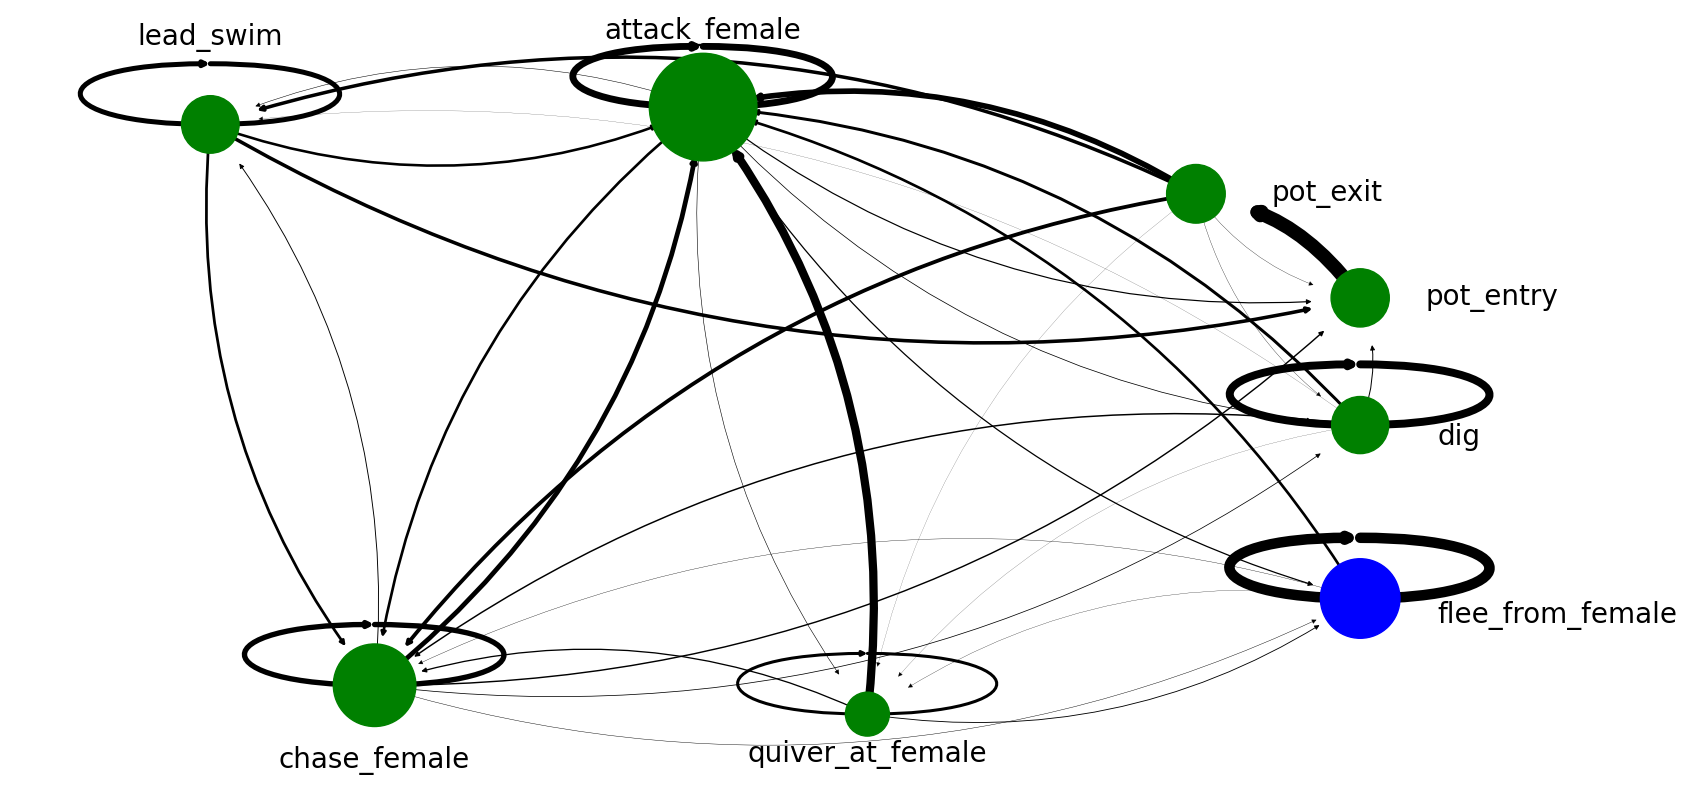

In [16]:
  """
This generates a directed graph (DiGraph) to visualize behavior combination transition probabilities greater than 0% .
It utilizes NetworkX library for graph creation and Matplotlib for visualization.
The function first constructs a DiGraph using the provided dictionaries and assigns node sizes based on the individual behavior's frequency values. 
Nodes are colored based on their type, such as red for aggressive behaviors, blue for fleeing behaviors, and green for reproductive behaviors. 
The width of edges represents the strength of transition probabilities, while edge labels denote these probabilities. 
Finally, node and edge labels are added to the graph to enhance interpretability.
    """
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import networkx as nx
G = nx.MultiDiGraph()
# Initialize a set to keep track of processed pairs
seen = set()

# Initialize edge_list to store edges with weights
edgelist = []

# Construct the edge list from rel_values
for pair, prob in rel_values.items():
    behavior1, behavior2 = pair.split('|')
    if prob > 0.001:
            G.add_edge(behavior1, behavior2, weight=prob)
            seen.add((behavior1, behavior2))
            edgelist.append((behavior1, behavior2, prob))  # Save the edge with weight

arrowThickness = []
for source, target, weight in edgelist:
    G.add_node(source)
    G.add_node(target)
    G.add_edge(source, target, weight=weight) 
    arrowThickness.append(weight) 
    
seed_value = 85
pos = nx.spring_layout(G, seed=seed_value, k=50)

# Define positions for fixed nodes
fixed_positions = { 'attack_female': (-5,40), 'quiver_at_female': (0, -65), 
                    'chase_female': (-15, -60), 'pot_entry': (15, 7), 
                   'dig': (15, -15), 'pot_exit': (10, 25), 'flee_from_female':(15,-45),
                   'lead_swim' : (-20,37)
                  
                  
                  }
print(G.nodes)

# Update positions with fixed node positions
pos.update(fixed_positions)

normalized_frequency_distribution = normalize_dict_to_range(varIndv)

node_sizes = {
    node: normalized_frequency_distribution[node] * 10 if node in normalized_frequency_distribution else default_size
    for node in G.nodes
}
color_map = {node: 'red' if node in ["lateral_display", "frontal_display", "bite_male", "chase_male", "quiver_at_male","attack_male"]
              else 'blue' if node in ["flee_from_male", "flee_from_female"]
              else 'green' if node in ["quiver_at_female", "lead_swim", "dig", "pot_entry", "pot_exit", "chase_female","pot_exit","attack_female","pot_entry"]
              else 'unknown'  # You may want to add a default color for other nodes
              for node in G}

fig, ax = plt.subplots(figsize=(20,10))

nx.draw(G, pos, edgelist=edgelist,node_size=[node_sizes[node] for node in G.nodes],node_color=[color_map[node] for node in G.nodes],
edge_color="white")


edge_labels = {(source, target): f'{weight:.2f}' for source, target, weight in edgelist if weight > 0 and source!=target}
edge_labels_self = {(source, target): f'{weight:.2f}' for source, target, weight in edgelist if weight > 0 and source == target}

arc_rad = 0.2


# Function to dynamically scale arrow size with a minimum size
def scale_arrow_size(weight):
    # Ensure minimum arrow size for visibility, but still scale based on weight
    if weight < 0.01:
        return 0.000
    return max(weight, 7)

def scale_edge_width(weight):
    if weight < 0.01:
        return 0
    return weight * 10 # You can adjust the multiplier as needed

# Drawing edges with scaled arrow sizes and widths
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=edgelist,
                       edge_cmap=plt.cm.gray_r,
                       arrows=True,  # Ensures arrow drawing
                       arrowstyle='-|>',  # Arrow style for clear visibility
                       arrowsize=[scale_arrow_size(weight) for weight in arrowThickness],
                       width=[scale_edge_width(weight) for weight in arrowThickness], 
                       connectionstyle=f'arc3, rad = {arc_rad}',  # Curve style for visibility
                       min_source_margin=0, min_target_margin=35)  # Ensures arrows are outside nodes





for node, (x, y) in pos.items():
    if node == 'chase_male':
        plt.text(x-8, y , str(node), ha='center', va='center', fontsize=20)
    elif node == 'pot_entry' :
        plt.text(x+4, y , str(node), ha='center', va='center', fontsize=20)
    elif node == 'attack_female':
        plt.text(x, y+13 , str(node), ha='center', va='center', fontsize=20)
    elif node == 'chase_female' :
        plt.text(x, y-13 , str(node), ha='center', va='center', fontsize=20)
    elif node=='quiver_at_female' :
        plt.text(x, y-7, str(node), ha='center', va='center', fontsize=20)  
    elif node == 'pot_exit':
        plt.text(x+4, y , str(node), ha='center', va='center', fontsize=20) 
    elif  node == 'dig' :
        plt.text(x+3, y-2 , str(node), ha='center', va='center', fontsize=20)   
    elif  node == 'flee_from_female' :
        plt.text(x+6, y-3 , str(node), ha='center', va='center', fontsize=20)
    elif  node == 'flee_from_male' :
        plt.text(x-8, y , str(node), ha='center', va='center', fontsize=20)
    elif node=='lateral_display' :
        plt.text(x+6, y, str(node), ha='center', va='center', fontsize=20) 
    elif node=='lead_swim' :
        plt.text(x, y+15, str(node), ha='center', va='center', fontsize=20)  
    elif node=='quiver_at_male' :
        plt.text(x, y+7, str(node), ha='center', va='center', fontsize=20)  
    elif node=='attack_male' :
        plt.text(x-7, y-1, str(node), ha='center', va='center', fontsize=20)   
        
            
            
plt.show()
